#### Problem statement

- Based on the given financial data create a ML model to predict if   the client is high risk or low risk if we were to provide them loan.
- We need to predict the column Risk_Flag and it contains value 1 if the client is  high risk else it will be 0.
 
Perform all the various steps of machine learning like data exploration, feature engineering and model building.
 
Create a PDF report and share it containing below details:
- data vizualizations
- data exploration insights
- model performance
- understand main deciding factors associated with risk

#### Import the requried Libraires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load the Data  

In [2]:
#Load the Data set from the json file
df = pd.read_json('loan_approval_dataset.json')

In [3]:
#display the first 5 rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.shape

(252000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [6]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


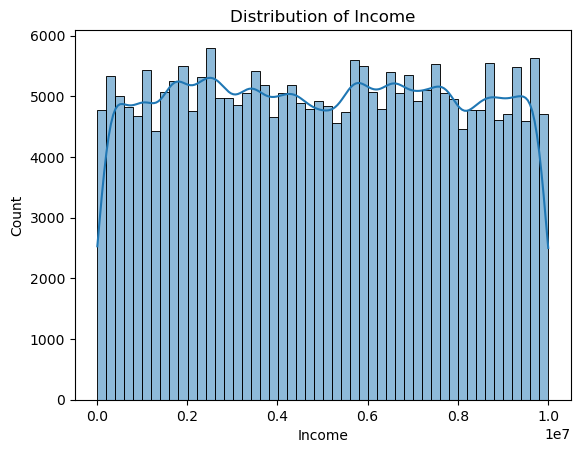

In [7]:
# Distribution of Income
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Distribution of Income')
plt.show()

The column Risk_Flag,contains
- value 1 if the client is high risk
- Value 0 ,if the Client is Low Risk.

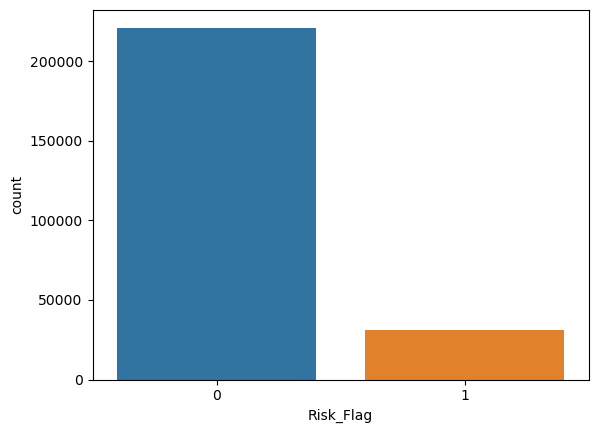

In [8]:
##Data Distribution
sns.countplot(x = 'Risk_Flag',data = df)
plt.show()

In [9]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [10]:
##Data Distribution of Married/Single 
df['Married/Single'].value_counts()

Married/Single
single     226272
married     25728
Name: count, dtype: int64

In [11]:
##Data Distribution of 'House_Ownership'
df['House_Ownership'].value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

In [12]:
##Data Distribution of 'Car_Ownership '
df['Car_Ownership'].value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

In [15]:
##Data Distribution of 'Profession'
df['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [16]:
##Data Distribution of 'CITY'
df['CITY'].value_counts() 

CITY
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: count, Length: 317, dtype: int64

In [17]:
##Data Distribution of 'STATE'
df['STATE'].value_counts() 

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64

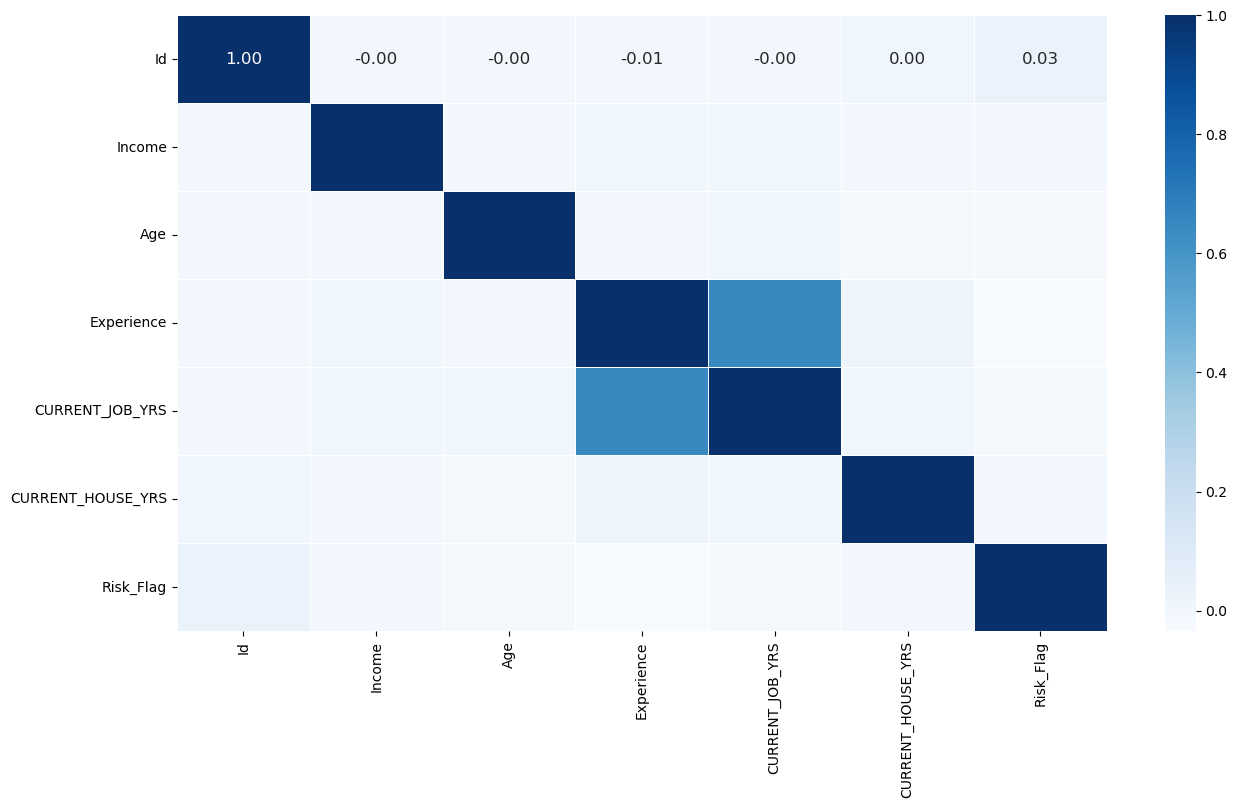

In [18]:
##Corelation Analysis
numeric_features = df.select_dtypes(exclude='object')

plt.figure(figsize=(15, 8))
corr = numeric_features.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, annot_kws={"size": 12})
plt.show()

<Figure size 1200x1000 with 0 Axes>

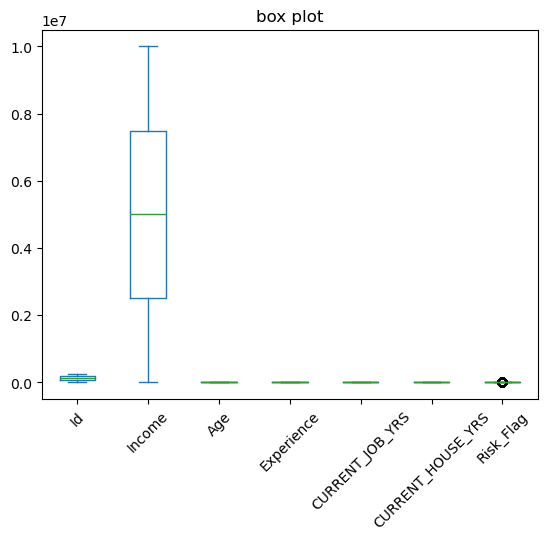

In [19]:
#Box-plot to check the outliers 
plt.figure(figsize = (12,10))
numeric_features.plot(kind = 'box',title = 'box plot')
plt.xticks(rotation = 45)
plt.show()

 ### Feature Engineering
- Handling Missing Values
- Feature Encoding
- Feature Scaling


In [20]:
##Identify any missing values in the dataset.
print(df.isnull().sum())


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [21]:
##There are null values in the data

In [22]:
categorical_features = df.select_dtypes(include ='object')
categorical_features.columns

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [24]:
l_encoder = LabelEncoder()

#apply the label encoder for the Categorical Columns
for column in categorical_features:
    df[column] = l_encoder.fit_transform(df[column]) 

In [25]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,233,18,0,10,0


In [26]:
numeric_features.columns

Index(['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# List of numerical columns
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Apply StandardScaler for the above  numerical columns 
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [28]:

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,-1.283145,-1.579604,-1.180232,1,2,0,33,251,13,-0.914131,0.716356,0
1,2,0.895457,-0.583344,-0.014067,1,2,0,43,227,14,0.731036,0.716356,0
2,3,-0.349269,0.940348,-1.013637,0,2,0,47,8,12,-0.639936,-1.427981,0
3,4,0.437526,-0.524740,-1.346827,1,2,1,43,54,17,-1.188325,0.001577,1
4,5,0.268128,-0.173119,0.152528,1,2,0,11,296,22,-0.914131,1.431135,1


 ### Model Building
 
Split the Data
- Separate the dataset into features and target variable, then split into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

##Define the features and target
## we can drop the colum of 'ID' and taget colum of 'Risk_Flag'
X = df.drop(columns = ['Id','Risk_Flag'])
y = df['Risk_Flag']

In [30]:
pd.DataFrame(X)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,1,2,0,33,251,13,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,1,2,0,43,227,14,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,0,2,0,47,8,12,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,1,2,1,43,54,17,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,1,2,0,11,296,22,-0.914131,1.431135
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,1,2,0,45,162,28,-0.091547,-0.713202
251996,-0.748199,-1.403793,-0.014067,1,2,0,3,251,13,-0.091547,-0.713202
251997,-0.164913,-0.231723,-0.513852,1,2,0,17,144,14,0.182647,0.001577
251998,0.524618,-0.290326,-1.680018,1,2,0,27,233,18,-1.736714,-1.427981


In [31]:
pd.DataFrame(y)

,Risk_Flag
0,0
1,0
2,0
3,1
4,1
...,...
251995,0
251996,0
251997,0
251998,0


In [32]:
#Split the Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42 )


In [33]:
#print the shapes
print("The Shape of X_train and X_test",X_train.shape,X_test.shape)
print("The Shape of y_train and y_test",y_train.shape,y_test.shape)

The Shape of X_train and X_test (176400, 11) (75600, 11)
The Shape of y_train and y_test (176400,) (75600,)


### Train the Model

In [56]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [45]:
# Initialize models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
lr_model = LogisticRegression()
xgb_model = XGBClassifier()

# Fit the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
print(" ")


### Model Evalution


In [54]:
# Comparison of Models
models = {
    'LogisticRegression':log_model,
    'XGBClassifier':xgb_model,
    'RandomForest': rf_model,
    'GradientBoosting': gb_model,
    'AdaBoost': ab_model
}


for name, model in models.items():
    test_data_pred = model.predict(X_test)
    train_data_pred = model.predict(X_train)
    print("Accuracy of the Train  Data of ",name,"Model is",accuracy_score(y_train,train_data_pred))
    print("Accuracy of the Test   Data of ",name,"Model is",accuracy_score(y_test,test_data_pred))
    print('------'*10)



Accuracy of the Train  Data of  LogisticRegression Model is 0.8768424036281179
Accuracy of the Test   Data of  LogisticRegression Model is 0.8773677248677249
------------------------------------------------------------
Accuracy of the Train  Data of  XGBClassifier Model is 0.8941836734693878
Accuracy of the Test   Data of  XGBClassifier Model is 0.8886507936507937
------------------------------------------------------------
Accuracy of the Train  Data of  RandomForest Model is 0.9373356009070295
Accuracy of the Test   Data of  RandomForest Model is 0.8991137566137566
------------------------------------------------------------
Accuracy of the Train  Data of  GradientBoosting Model is 0.8770521541950114
Accuracy of the Test   Data of  GradientBoosting Model is 0.8775925925925926
------------------------------------------------------------
Accuracy of the Train  Data of  AdaBoost Model is 0.8769331065759637
Accuracy of the Test   Data of  AdaBoost Model is 0.8774867724867725
------------

In [64]:
from sklearn.metrics import roc_auc_score

#Find  the ROC-AUC for all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test,y_pred)
    print(f"ROC-AUC of {name} Model: {roc_auc}")
    print('------'*10)


ROC-AUC of LogisticRegression Model: 0.5
------------------------------------------------------------
ROC-AUC of XGBClassifier Model: 0.5953662809410432
------------------------------------------------------------
ROC-AUC of RandomForest Model: 0.7467260036338179
------------------------------------------------------------
ROC-AUC of GradientBoosting Model: 0.501148804619245
------------------------------------------------------------
ROC-AUC of AdaBoost Model: 0.5005781714000656
------------------------------------------------------------


### Random Forest Classifier given good accurcay on the train and test data ,then other models ,so we continue with the RandomForest

In [57]:
# Evaluate the model using the random forst Classifier
#rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy of the Random Forest",accuracy_score(y_test,y_pred_rf))
print("-----"*10)
print(confusion_matrix(y_test, y_pred_rf))



Accuracy of the Random Forest 0.8991137566137566
--------------------------------------------------
[[62922  3407]
 [ 4220  5051]]


### Confusion Matrix Breakdown

True Positives (TP): 5,051 
– The number of high-risk(1) clients correctly identified as high-risk.

False Positives (FP): 3,407
– The number of low-risk(1) clients incorrectly identified as high-risk.

False Negatives (FN): 4,220
– The number of high-risk(1) clients incorrectly identified as low-risk.

True Negatives (TN): 62,922 
– The number of low-risk(0) clients correctly identified as low-risk.


In [59]:
report = classification_report(y_test, y_pred_rf,target_names = ['Low_Risk','High_Risk'])
print(report)


              precision    recall  f1-score   support

    Low_Risk       0.94      0.95      0.94     66329
   High_Risk       0.60      0.54      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:-",precision_score(y_test,y_pred_rf))
print("Recall:-",recall_score(y_test,y_pred_rf))
print("F1-Score:-",f1_score(y_test,y_pred_rf))

Precision:- 0.5971860960037834
Recall:- 0.5448171718261244
F1-Score:- 0.5698008911952167


- Hence,RandomForest Is the Model I have used for the problem.because it perform more better accuracy than other models.
- RandomForest has the Descent Precision and Recall